# 🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

# 1. Importando librerias.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score ,train_test_split, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

# 2. Extrayendo el archivo inicial tratado.

In [2]:
datos = pd.read_csv('telecomx.csv')
print(datos)
print(datos.columns)

       idCliente  Churn     genero  es_jubilado  tiene_pareja  \
0     0002-ORFBO  False   femenino        False          True   
1     0003-MKNFE  False  masculino        False         False   
2     0004-TLHLJ   True  masculino        False         False   
3     0011-IGKFF   True  masculino         True          True   
4     0013-EXCHZ   True   femenino         True          True   
...          ...    ...        ...          ...           ...   
7027  9987-LUTYD  False   femenino        False         False   
7028  9992-RRAMN   True  masculino        False          True   
7029  9992-UJOEL  False  masculino        False         False   
7030  9993-LHIEB  False  masculino        False          True   
7031  9995-HOTOH  False  masculino        False          True   

      tiene_dependientes  antiguedad  servicio_telefonico  multiples_lineas  \
0                   True           9                 True             False   
1                  False           9                 True    

# 3. Eliminación de columnas irrelevantes.

In [3]:
# Eliminando idCliente, puesto que no va a aportar valor al analisis ni al modelo
datos = datos.drop(columns='idCliente', axis=1)

print(datos)
datos.info()

      Churn     genero  es_jubilado  tiene_pareja  tiene_dependientes  \
0     False   femenino        False          True                True   
1     False  masculino        False         False               False   
2      True  masculino        False         False               False   
3      True  masculino         True          True               False   
4      True   femenino         True          True               False   
...     ...        ...          ...           ...                 ...   
7027  False   femenino        False         False               False   
7028   True  masculino        False          True               False   
7029  False  masculino        False         False               False   
7030  False  masculino        False          True                True   
7031  False  masculino        False          True                True   

      antiguedad  servicio_telefonico  multiples_lineas servicio_internet  \
0              9                 True         

# 4. Selección de las variables explicativas y la variable objetivo.

In [4]:
# variables explicativas
X = datos.drop(columns='Churn')
# variable respuesta
y = datos['Churn']

# 5. Encoding

In [5]:
columnas = X.columns


# Encoding
# Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.
preprocesador = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                        ['genero', 'es_jubilado', 'tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'multiples_lineas', 'servicio_internet', 'servicio_seguridad',
                                        'servicio_backup', 'servicio_proteccion', 'servicio_soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'tipo_contrato', 'factura_digital', 'metodo_pago']),
                                        remainder='passthrough',
                                        sparse_threshold=0)

X = preprocesador.fit_transform(X)

df_codificado = pd.DataFrame(X, columns=preprocesador.get_feature_names_out(columnas))

# codificando la variable respuesta
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

df_codificado['Churn'] = y

print(df_codificado)
print(df_codificado.info())

      onehotencoder__genero_masculino  onehotencoder__es_jubilado_True  \
0                                 0.0                              0.0   
1                                 1.0                              0.0   
2                                 1.0                              0.0   
3                                 1.0                              1.0   
4                                 0.0                              1.0   
...                               ...                              ...   
7027                              0.0                              0.0   
7028                              1.0                              0.0   
7029                              1.0                              0.0   
7030                              1.0                              0.0   
7031                              1.0                              0.0   

      onehotencoder__tiene_pareja_True  \
0                                  1.0   
1                          

# 6. Verificación de la proporción de Cancelación (Churn)

In [6]:
# Verificación de la Proporción de Cancelación (Churn)

print(datos['Churn'].value_counts())
print(datos['Churn'].value_counts(normalize=True)*100)
# Tasa de churn:
# False -> 73.42%
# True -> 26.57%

Churn
False    5163
True     1869
Name: count, dtype: int64
Churn
False    73.421502
True     26.578498
Name: proportion, dtype: float64


# 7. Balanceo de clases

In [7]:
# Balanceo de clases

oversample = SMOTE(random_state=82)

# 8. Normalización

In [8]:
# Normalización o estandarización

normalizacion = MinMaxScaler()

# 9. Analisis de correlación

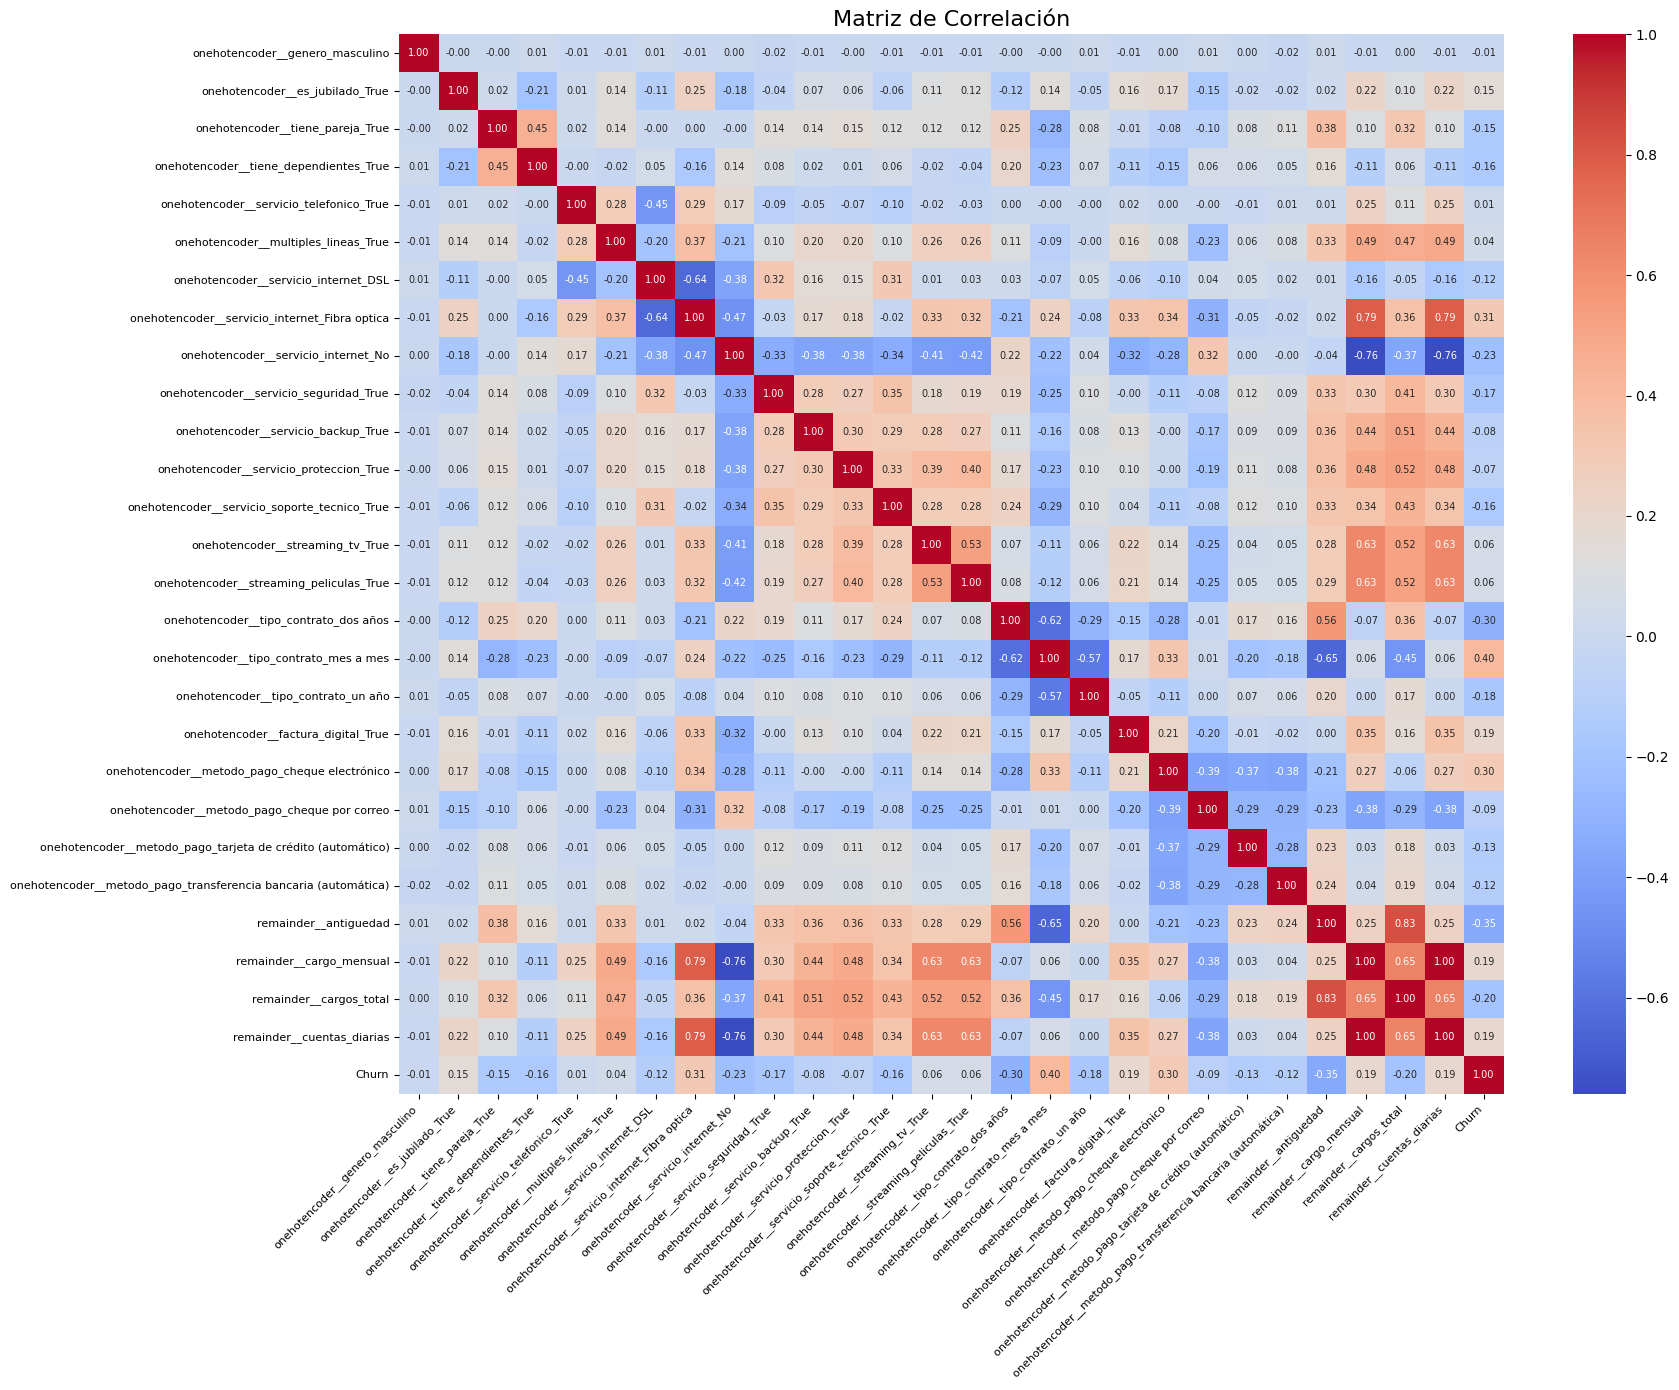

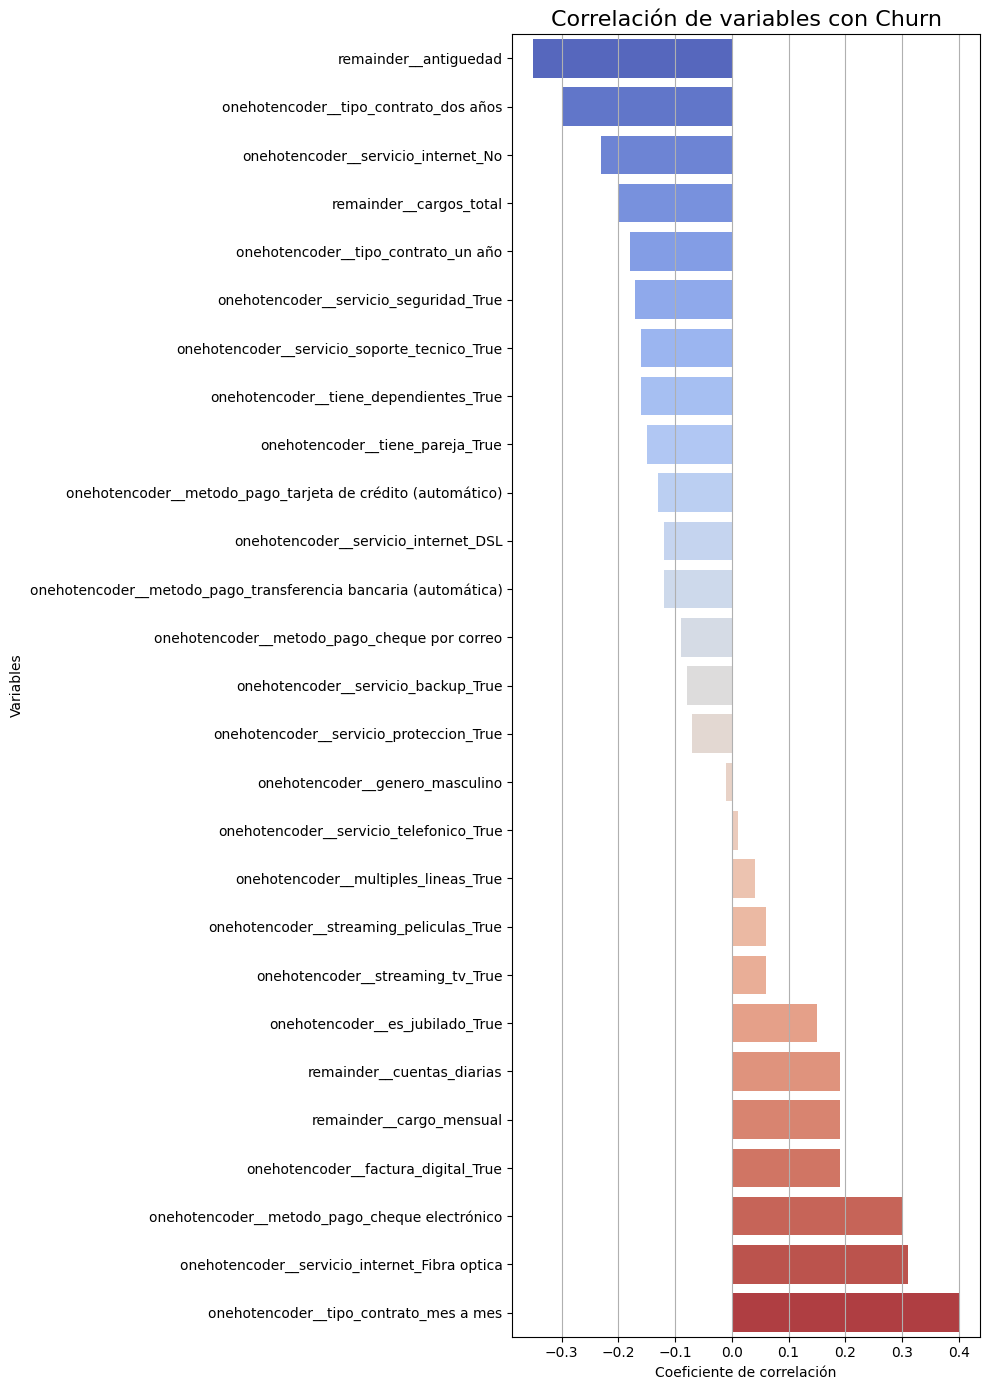

In [9]:
# Analisis de correlación y multicolinearidad

corr = df_codificado.corr().round(2)

plt.figure(figsize=(18, 14))  # definimos el tamaño de figura
sns.heatmap(corr,
            annot=True,         # mostramos los valores de correlación dentro de cada celda
            fmt=".2f",
            cmap='coolwarm',    # paleta de colores
            annot_kws={"size": 7})  # reducimos el tamaño del texto dentro de las celdas

plt.xticks(rotation=45, ha='right', fontsize=8)  # rotamos y achicamos los ticks del eje x
plt.yticks(fontsize=8)                           # tamaño de fuente de los ticks del eje y
plt.title("Matriz de Correlación", fontsize=16)
plt.tight_layout()
plt.show()

# Visualizando mejor las correlaciones con la variable Churn

corr = corr.drop(index='Churn').sort_values(by='Churn', ascending=True)

plt.figure(figsize=(10, 14))
sns.barplot(
    x='Churn',
    y=corr.index,
    data=corr,
    palette='coolwarm'
)
plt.title("Correlación de variables con Churn", fontsize=16)
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# 10. Analisis dirigido

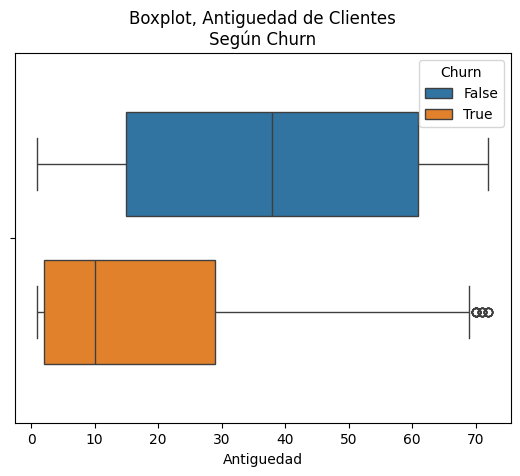

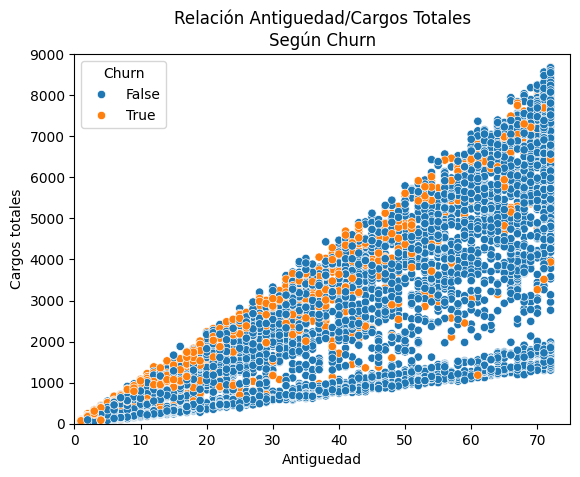

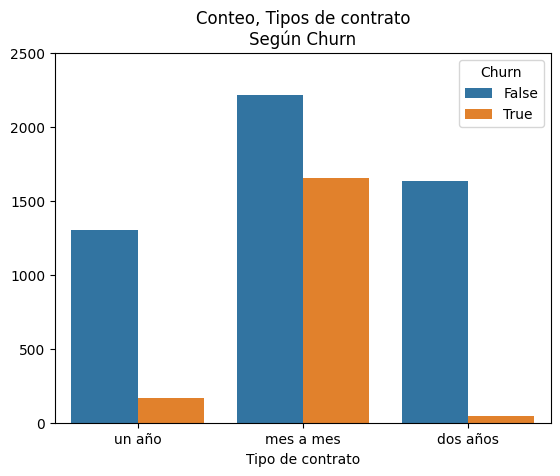

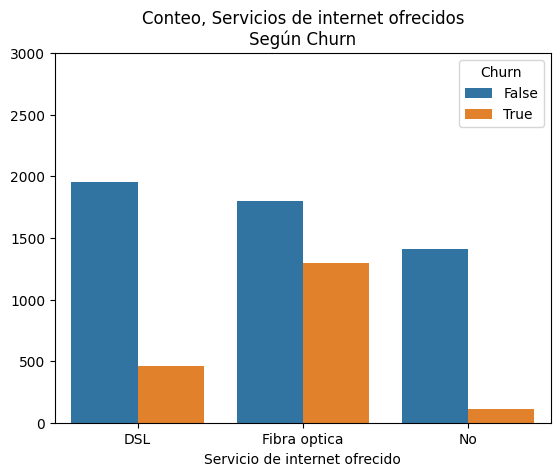

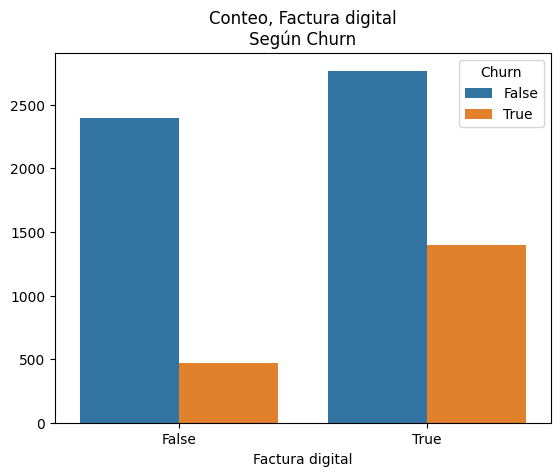

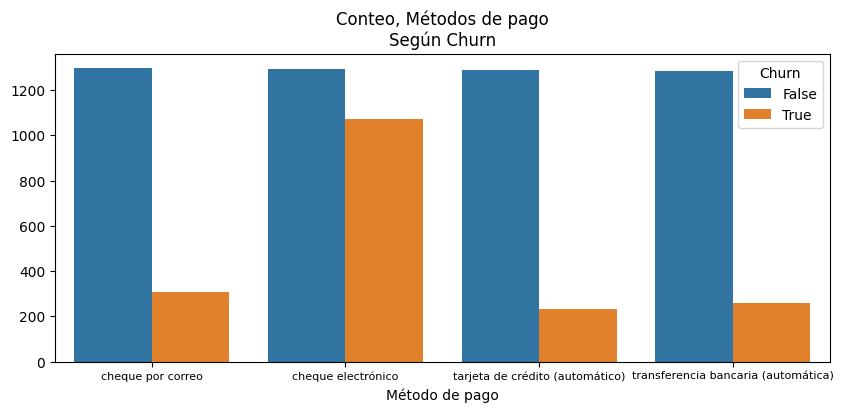

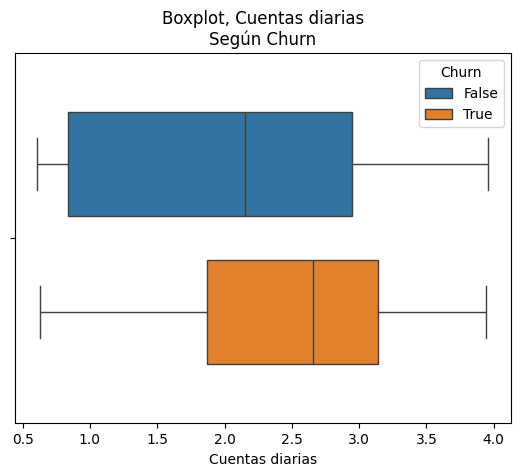

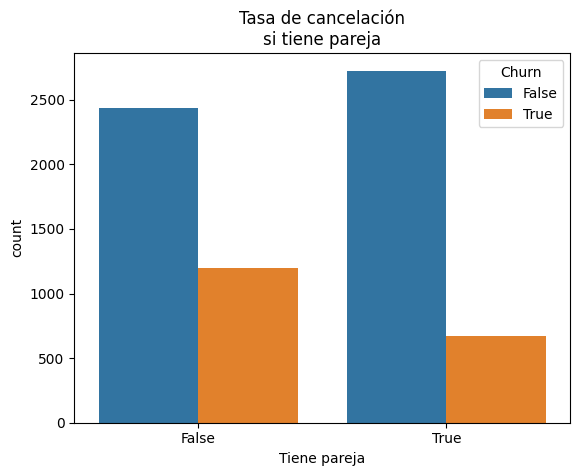

In [10]:
# Analisis dirigido

# REGLA DE STURGES
# k = 1 + (10/3) * np.log10(n)



# boxplot de la variable 'antiguedad' teniendo en cuenta el churn por cada cliente
sns.boxplot(data=datos, x='antiguedad', hue='Churn', gap=0.3)
plt.title('Boxplot, Antiguedad de Clientes\nSegún Churn')
plt.xlabel('Antiguedad')
plt.show()

#
sns.scatterplot(data=datos, x='antiguedad', y='cargos_total', hue='Churn')
plt.title('Relación Antiguedad/Cargos Totales\nSegún Churn')
plt.xlabel('Antiguedad')
plt.ylabel('Cargos totales')
plt.xlim((0, 75))
plt.ylim((0, 9000))
plt.show()

# countplot de la variable 'tipo_contrato', teniendo en cuenta 'Churn'
sns.countplot(data=datos, x='tipo_contrato', hue='Churn')
plt.title('Conteo, Tipos de contrato\nSegún Churn')
plt.xlabel('Tipo de contrato')
plt.ylabel('')
plt.ylim((0, 2500))
plt.show()

# countplot de la variable 'servicio_internet', teniendo en cuenta 'Churn'
sns.countplot(data=datos, x='servicio_internet', hue='Churn')
plt.title('Conteo, Servicios de internet ofrecidos\nSegún Churn')
plt.xlabel('Servicio de internet ofrecido')
plt.ylim((0, 3000))
plt.ylabel('')
plt.show()

# countplot de la variable 'factura_digital', teniendo en cuenta 'Churn'
sns.countplot(data=datos, x='factura_digital', hue='Churn')
plt.title('Conteo, Factura digital\nSegún Churn')
plt.xlabel('Factura digital')
plt.ylabel('')
plt.show()

# countplot de la variable 'metodo_pago', teniendo en cuenta 'Churn'
plt.figure(figsize=(10, 4))
sns.countplot(data=datos, x='metodo_pago', hue='Churn')
plt.title('Conteo, Métodos de pago\nSegún Churn')
plt.xlabel('Método de pago')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.show()

# boxplot de cuentas diarias, teniendo en cuenta 'Churn'
sns.boxplot(data=datos, x='cuentas_diarias', hue='Churn', gap=0.3)
plt.title('Boxplot, Cuentas diarias\nSegún Churn')
plt.xlabel('Cuentas diarias')
plt.show()

# countplot con la tasa de cancelación según tenga pareja el cliente o no
sns.countplot(data=datos, x='tiene_pareja', hue='Churn')
plt.title('Tasa de cancelación\nsi tiene pareja')
plt.xlabel('Tiene pareja')
plt.show()

# 11. Separación de datos

In [11]:
# Separación de datos

# antiguedad, correlación negativa
# contrato dos años, correlación negativa
# cargos total, correlación negativa
# no servicio internet, correlación negativa
# cargos totales, correlación negativa

# contrato mes a mes, correlación positiva
# fibra optica, correlación positiva
# cheque electronico, correlación positiva
# mensual, cuentas diarias, factura digital true, correlacion positiva

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=82, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=82)

# Balanceo de clases

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# 12. Creación de modelos

In [ ]:
# CREACION DE MODELOS

# Baseline

dummy = DummyClassifier()
dummy.fit(X_train_smote, y_train_smote)
print(dummy.score(X_test, y_test))

# DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(max_depth=5 ,random_state=82, min_samples_leaf=1, min_samples_split=2)
modelo_arbol.fit(X_train_smote, y_train_smote)

# RandomForestClassifier

modelo_forest = RandomForestClassifier(max_depth=5, random_state=82, min_samples_leaf=3, min_samples_split=5, n_estimators=100)
modelo_forest.fit(X_train_smote, y_train_smote)

# KNeighborsClassifier

X_train_normalize = normalizacion.fit_transform(X_train_smote)
X_test_normalize = normalizacion.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_normalize, y_train_smote)

0.7341862117981521


KNeighborsClassifier()

# 13. Evaluación de los modelos

## 1.1 Validación Cruzada


In [13]:
# Validación cruzada

def intervalo_confianza(validacion, nombreModelo):
  promedio = validacion.mean()
  std = validacion.std()
  return f'intervalo de confianza, modelo {nombreModelo}: [{promedio - (2*std)}, {min((promedio + (2*std)), 1)}]'

stratkf = StratifiedKFold(n_splits=5, random_state=82, shuffle=True)

pipeline = Pipeline([('oversample', SMOTE()), ('arbol', modelo_arbol)])
validacion = cross_val_score(pipeline, X_temp, y_temp, cv=stratkf, scoring='recall') # evaluamos la metrica recall (sensibilidad)

print(intervalo_confianza(validacion, 'arbol'))

pipeline = Pipeline([('oversample', SMOTE()), ('forest', modelo_forest)])
validacion = cross_val_score(pipeline, X_temp, y_temp, cv=stratkf, scoring='recall')
print(intervalo_confianza(validacion, 'forest'))

pipeline = Pipeline([('oversample', SMOTE()), ('knn', knn)])
validacion = cross_val_score(pipeline, X_temp, y_temp, cv=stratkf, scoring='recall')
print(intervalo_confianza(validacion, 'knn'))

intervalo de confianza, modelo arbol: [0.4309584592670841, 0.818539868492113]
intervalo de confianza, modelo forest: [0.702632652081554, 0.8251265452428609]
intervalo de confianza, modelo knn: [0.5935456648782881, 0.7000998200715448]


## 1.2 Metricas de evaluación

{'Accuracy': 0.7548, 'F1': 0.623, 'Recall': 0.762, 'Precision': 0.5268}


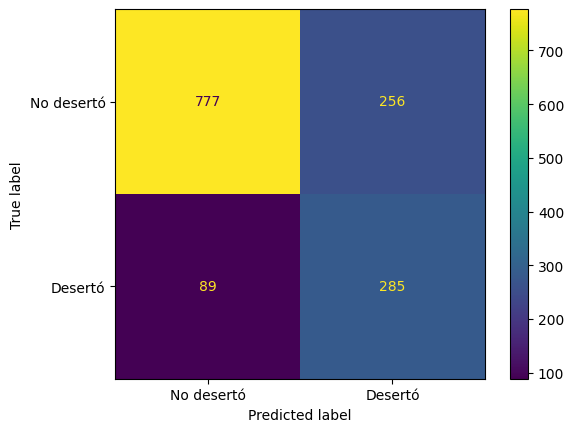

{'Accuracy': 0.7477, 'F1': 0.6007, 'Recall': 0.7139, 'Precision': 0.5184}


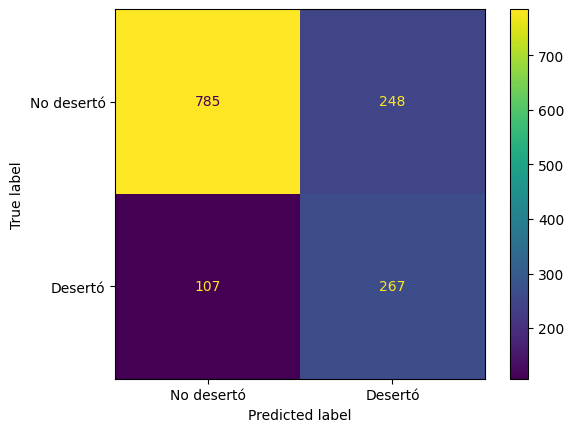

{'Accuracy': 0.6752, 'F1': 0.5303, 'Recall': 0.6898, 'Precision': 0.4307}


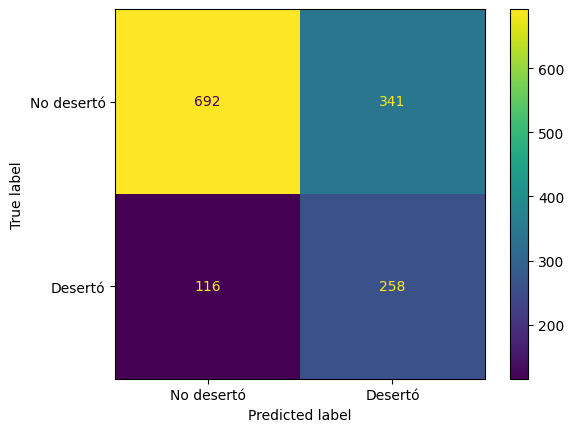

In [14]:
# Metricas de evaluación

def calcularMetricas(y_true ,y_pred):
  accuracy = accuracy_score(y_val, y_pred)
  f1 = f1_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  metricas = {'Accuracy': round(accuracy, 4),
              'F1': round(f1, 4),
              'Recall': round(recall, 4),
              'Precision': round(precision, 4)}
  return metricas

# Matriz de confusión
def matriz_confusion(y_true, y_pred):
  matriz = confusion_matrix(y_val, y_pred)
  visualizer = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No desertó', 'Desertó'])
  return visualizer.plot()

# modelo arbol
y_pred = modelo_arbol.predict(X_val)
print(calcularMetricas(y_val ,y_pred))

visualizer = matriz_confusion(y_val, y_pred)
plt.show()

# modelo forest
y_pred = modelo_forest.predict(X_val)
print(calcularMetricas(y_val ,y_pred))

visualizer = matriz_confusion(y_val, y_pred)
plt.show()

# modelo knn
X_val_normalize = normalizacion.transform(X_val)
y_pred = knn.predict(X_val_normalize)
print(calcularMetricas(y_val ,y_pred))

visualizer = matriz_confusion(y_val, y_pred)
plt.show()


## 1.3 Rendimiento de los modelos

In [15]:
# Score con los datos de entrenamiento
print(modelo_arbol.score(X_train_smote, y_train_smote))
print(modelo_forest.score(X_train_smote, y_train_smote))
print(knn.score(X_train_normalize, y_train_smote))

print('\n')
# Score con los datos de prueba
print(modelo_arbol.score(X_test, y_test))
print(modelo_forest.score(X_test, y_test))
print(knn.score(X_test_normalize, y_test))


# Todos los modelos presentaron overfitting

0.8188861985472154
0.8407990314769975
0.8554479418886198


0.7547974413646056
0.7476901208244492
0.6751954513148543


## 1.4 Curva de Precision x Recall

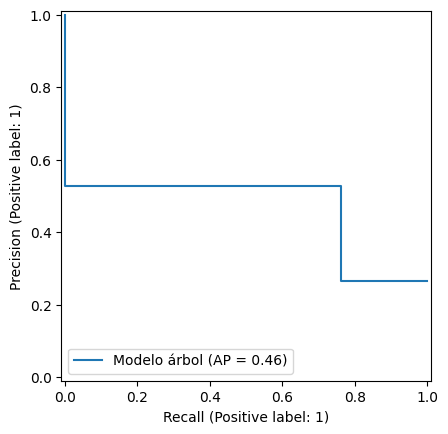

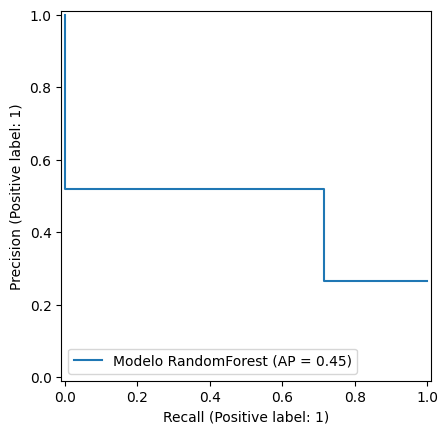

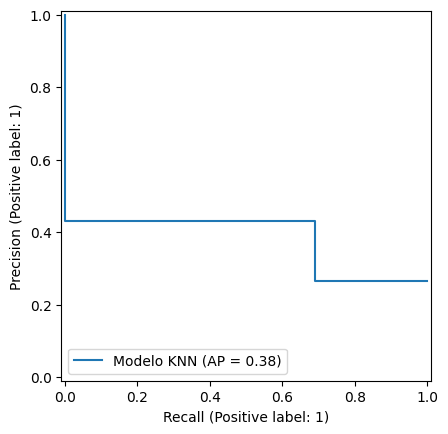

In [16]:
y_pred = modelo_arbol.predict(X_val)
PrecisionRecallDisplay.from_predictions(y_val, y_pred, name='Modelo árbol')
plt.show()

y_pred = modelo_forest.predict(X_val)
PrecisionRecallDisplay.from_predictions(y_val, y_pred, name='Modelo RandomForest')
plt.show()

y_pred = knn.predict(X_val_normalize)
PrecisionRecallDisplay.from_predictions(y_val, y_pred, name='Modelo KNN')
plt.show()

* ¿Cuál modelo tuvo el mejor desempeño?

El modelo que mostró un mejor desempeño en 'accuracy' fue el modelo RandomForest, mientras que el peor fue el modelo KNN, inclusive peor que el modelo utilizado como baseline (**DummyClassifier**).

* ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Todos los modelos presentaron overfitting, siendo el modelo KNN el mas afectado por ello, perdiendo un 18% de su capacidad predictiva, lo que indica que se ajusto demasiado a los datos de entrenamiento y generalizó mal en datos no vistos.



---

Sin embargo, estamos teniendo en cuenta la metrica 'accuracy', recordemos que la misma se encarga de evaluar cuantas predicciones correctas tuvo sobre el total de elementos. Dado el problema del desafio, donde lo que nos interesa es realmente tener una mejor capacidad predictiva sobre aquellos clientes que desertaron (Churn), no es la metrica en la que debemos enfocarnos, sino en 'Recall' (Sensibilidad).

En esta metrica, el que mejor rendimiento tuvo fue el modelo KNN, clasificando correctamente un 69% de estos casos, mientras que el modelo de árbol fue el peor, con un 51% de predicciones correctas sobre el total de casos Churn.

Esto muestra que, aunque KNN fue el modelo con menor *accuracy*, es el modelo que mejor cumple con el objetivo: identificar a los clientes que probablemente deserten. Por tanto, dependiendo de la prioridad del problema, KNN podría considerarse el modelo más útil, a pesar de su menor desempeño general.


---



# 14. Análisis de la Importancia de las Variables/Optimización de parametros

## Modelo RandomForestClassifier()

In [17]:
# Convertimos X_train_smote y X_val a df para seleccionar las features
X_train_smote_df = pd.DataFrame(X_train_smote, columns=df_codificado.drop(columns='Churn', axis=1).columns)
X_val_df = pd.DataFrame(X_val, columns=df_codificado.drop(columns='Churn', axis=1).columns)

importancias = modelo_forest.feature_importances_
ft_importances = pd.DataFrame({'Features': df_codificado.drop(columns='Churn', axis=1).columns,
                               'Importancia': (importancias*100).round(2)}).sort_values('Importancia', ascending=False)

print(ft_importances)

model_features = RandomForestClassifier(n_estimators = 50, min_samples_leaf=3, min_samples_split=5, max_depth=2, random_state=82)

resultados = pd.DataFrame(index=['Accuracy', 'F1', 'Recall', 'Precision'])

ct_features = [i for i in range(1, 29)]

for i in ct_features:
    selected_features = ft_importances['Features'].values[:i]
    X_train_sel = X_train_smote_df[selected_features]
    X_val_sel = X_val_df[selected_features]
    model_features.fit(X_train_sel, y_train_smote) # Fit on the resampled training data
    y_previsto = model_features.predict(X_val_sel)
    metricas = calcularMetricas(y_val, y_previsto) # Evaluate on the original test data
    resultados[i] = list(metricas.values())


print(resultados)

                                             Features  Importancia
16             onehotencoder__tipo_contrato_mes a mes        26.36
19      onehotencoder__metodo_pago_cheque electrónico        12.77
15              onehotencoder__tipo_contrato_dos años         9.28
23                              remainder__antiguedad         8.31
7       onehotencoder__servicio_internet_Fibra optica         7.09
18                onehotencoder__factura_digital_True         5.21
17                onehotencoder__tipo_contrato_un año         4.19
2                    onehotencoder__tiene_pareja_True         3.41
12       onehotencoder__servicio_soporte_tecnico_True         3.35
25                            remainder__cargos_total         2.65
3              onehotencoder__tiene_dependientes_True         2.52
26                         remainder__cuentas_diarias         2.39
9              onehotencoder__servicio_seguridad_True         2.39
24                           remainder__cargo_mensual         

✅ 10 features parece ser lo mas optimo, puesto que tenemos un buen puntaje en recall y mantenemos un buen puntaje en accuracy

In [18]:
forest_features = ft_importances['Features'].values[:10]
X_selected_features = df_codificado[forest_features]

## Segmentando datos para RandomForest()

In [19]:
# segmentando nuevamente los datos con las mejores features
X_temp, X_test, y_temp, y_test = train_test_split(X_selected_features, y, stratify=y, random_state=82, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, stratify=y_temp, random_state=82, test_size=0.2)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [20]:
forest = RandomForestClassifier(n_estimators = 50, min_samples_leaf=3, min_samples_split=5, max_depth=2, random_state=82)
forest.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=2, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=50, random_state=82)

In [21]:
print(forest.score(X_train_smote, y_train_smote))
print(forest.score(X_test, y_test))

0.7963075060532687
0.7348969438521677


## Optimizando hiperparametros, RandomForest()

In [22]:
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Para RandomForest
grid_forest = GridSearchCV(RandomForestClassifier(random_state=82), param_grid_forest, cv=stratkf, scoring='recall')
grid_forest.fit(X_train_smote, y_train_smote)

print(grid_forest.best_params_)

best_forest = grid_forest.best_estimator_

best_forest.fit(X_train_smote, y_train_smote)


y_pred = best_forest.predict(X_val)
print(calcularMetricas(y_val, y_pred))

{'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
{'Accuracy': 0.7751, 'F1': 0.6442, 'Recall': 0.7659, 'Precision': 0.5558}


Opte por modificar manualmente los parametros del modelo RandomForest porque no quede conforme con los resultados dados por GridSearchCV

In [23]:
# Ajuste manual de parametros para el modelo forest
forest = RandomForestClassifier(n_estimators = 100, min_samples_leaf=1, min_samples_split=2, max_depth=2, random_state=82)
forest.fit(X_train_smote, y_train_smote)

# calculamos las metricas de evaluación
y_pred = forest.predict(X_val)
print(calcularMetricas(y_val, y_pred))

{'Accuracy': 0.7298, 'F1': 0.6228, 'Recall': 0.8395, 'Precision': 0.4951}


## Modelo DecisionTreeClassifier()

In [24]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=82, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=82)

# Balanceo de clases

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [25]:
importancias = modelo_arbol.feature_importances_
ft_importances = pd.DataFrame({'Features': df_codificado.drop(columns='Churn', axis=1).columns,
                               'Importancia': (importancias*100).round(2)}).sort_values('Importancia', ascending=False)

print(ft_importances)

model_features = DecisionTreeClassifier(max_depth=5 ,random_state=82, min_samples_leaf=1, min_samples_split=2)

resultados = pd.DataFrame(index=['Accuracy', 'F1', 'Recall', 'Precision'])

ct_features = [i for i in range(1, 29)]
print(ct_features)

for i in ct_features:
    selected_features = ft_importances['Features'].values[:i]
    X_train_sel = X_train_smote_df[selected_features]
    X_val_sel = X_val_df[selected_features]
    model_features.fit(X_train_sel, y_train_smote) # Fit on the resampled training data
    y_previsto = model_features.predict(X_val_sel)
    metricas = calcularMetricas(y_val, y_previsto) # Evaluate on the original test data
    resultados[i] = list(metricas.values())


print(resultados)

                                             Features  Importancia
16             onehotencoder__tipo_contrato_mes a mes        61.09
19      onehotencoder__metodo_pago_cheque electrónico        19.82
7       onehotencoder__servicio_internet_Fibra optica         5.80
23                              remainder__antiguedad         4.47
26                         remainder__cuentas_diarias         2.53
17                onehotencoder__tipo_contrato_un año         2.27
25                            remainder__cargos_total         2.26
15              onehotencoder__tipo_contrato_dos años         1.27
9              onehotencoder__servicio_seguridad_True         0.46
24                           remainder__cargo_mensual         0.02
0                     onehotencoder__genero_masculino         0.00
10                onehotencoder__servicio_backup_True         0.00
8                 onehotencoder__servicio_internet_No         0.00
5                onehotencoder__multiples_lineas_True         

✅ 6 Features parece ser lo mas optimo, puesto que tenemos un buen recall (77.54%) y no perdemos demasiado con las otras metricas.

## Segmentando datos para DecisionTree()

In [26]:
tree_features = ft_importances['Features'].values[:6]
X_selected_features = df_codificado[tree_features]

In [27]:
# segmentando nuevamente los datos con las mejores features
X_temp, X_test, y_temp, y_test = train_test_split(X_selected_features, y, stratify=y, random_state=82, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, stratify=y_temp, random_state=82, test_size=0.2)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [28]:
modelo_arbol = DecisionTreeClassifier(max_depth=5 ,random_state=82, min_samples_leaf=1, min_samples_split=2)
modelo_arbol.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=5, random_state=82)

In [29]:
print(modelo_arbol.score(X_train_smote, y_train_smote))
print(modelo_arbol.score(X_test, y_test))

0.7911622276029056
0.7412935323383084


## Optimizando hiperparametros, DecisionTree()

In [30]:
param_grid_tree = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Para DecisionTree
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=82), param_grid_tree, cv=stratkf, scoring='recall')
grid_tree.fit(X_train_smote, y_train_smote)

print(grid_tree.best_params_)

best_tree = grid_tree.best_estimator_

best_tree.fit(X_train_smote, y_train_smote)

# metricas, mejores estimadores de gridsearchcv

y_pred = best_tree.predict(X_val)
print(calcularMetricas(y_val, y_pred))

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'Accuracy': 0.7413, 'F1': 0.6094, 'Recall': 0.7592, 'Precision': 0.509}


✅ Opte por modificar el parametro max_depth, lo crei necesario para obtener un mejor rendimiento

In [31]:
modelo_arbol = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2)
modelo_arbol.fit(X_train_smote, y_train_smote)

y_pred = modelo_arbol.predict(X_val)
print(calcularMetricas(y_val, y_pred))

{'Accuracy': 0.7529, 'F1': 0.6371, 'Recall': 0.8161, 'Precision': 0.5225}


## Modelo KNeighborsClassifier()

In [32]:
columnas = df_codificado.drop('Churn', axis=1).columns
X_train_normalize_df = pd.DataFrame(X_train_normalize, columns=columnas)
X_test_normalize_df = pd.DataFrame(X_test_normalize, columns=columnas)

In [33]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=82, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=82)

# Balanceo de clases

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [34]:
importancias_knn = permutation_importance(knn, X_train_normalize, y_train_smote, n_repeats=30, random_state=82, n_jobs=-1, scoring='recall')
importancias_df = pd.DataFrame({
    'Features': columnas,
    'Importancia': importancias_knn.importances_mean
}).sort_values('Importancia', ascending=False)

print(importancias_df)

knn_feature = KNeighborsClassifier()

resultados = pd.DataFrame(index=['Accuracy', 'F1', 'Recall', 'Precision'])

# Evaluar desde 1 hasta todas las features
for i in range(1, len(importancias_df)+1):
    selected_features = importancias_df['Features'].values[:i]

    X_train_sel = X_train_normalize_df[selected_features]
    X_test_sel = X_test_normalize_df[selected_features]

    knn_feature.fit(X_train_sel, y_train_smote)
    y_pred = knn_feature.predict(X_test_sel)

    metricas = calcularMetricas(y_val, y_pred)
    resultados[i] = list(metricas.values())

# Mostrar resultados
print(resultados.T)

                                             Features  Importancia
23                              remainder__antiguedad     0.039508
0                     onehotencoder__genero_masculino     0.028967
5                onehotencoder__multiples_lineas_True     0.026594
25                            remainder__cargos_total     0.024189
18                onehotencoder__factura_digital_True     0.022252
2                    onehotencoder__tiene_pareja_True     0.017159
9              onehotencoder__servicio_seguridad_True     0.015359
3              onehotencoder__tiene_dependientes_True     0.011445
10                onehotencoder__servicio_backup_True     0.011429
1                     onehotencoder__es_jubilado_True     0.010210
4             onehotencoder__servicio_telefonico_True     0.009903
11            onehotencoder__servicio_proteccion_True     0.008410
14            onehotencoder__streaming_peliculas_True     0.007934
26                         remainder__cuentas_diarias     0.00

✅ 19 features parece ser el numero optimo de features para el modelo knn

In [35]:
knn_features = importancias_df['Features'].values[:19]

In [36]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # 1=manhattan, 2=euclidean
}


# Para KNeighbors
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=stratkf, scoring='recall')
grid_knn.fit(X_train_normalize, y_train_smote)

print(grid_knn.best_params_)


best_knn = grid_knn.best_estimator_


best_knn.fit(X_train_normalize, y_train_smote)



y_pred = best_knn.predict(X_val_normalize)
print(calcularMetricas(y_val, y_pred))

{'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
{'Accuracy': 0.683, 'F1': 0.5661, 'Recall': 0.7781, 'Precision': 0.445}


# 15. Modelos finales

## RandomForestClassifier()

In [37]:
X_selected_features = df_codificado[forest_features] # del df codificado, seleccionamos las mejores features para el modelo RandomForest

champion_forest = RandomForestClassifier(n_estimators = 100, min_samples_leaf=1, min_samples_split=2, max_depth=2, random_state=82) # instanciamos un modelo randomforest parametrizado

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=82, test_size=0.2, stratify=y) # dividimos los datos

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train) # hacemos oversampling solo al conjunto de entrenamiento

champion_forest.fit(X_train_smote, y_train_smote) # entrenamos el modelo con el conjunto de entrenamiento oversampleado

y_pred = champion_forest.predict(X_test)

print(calcularMetricas(y_test, y_pred)) # metricas de evaluación del modelo random forest

{'Accuracy': 0.7107, 'F1': 0.5974, 'Recall': 0.8075, 'Precision': 0.4741}


## DecisionTreeClassifier()

In [38]:
X_selected_features = df_codificado[tree_features] # del df codificado seleccionamos las mejores features para el modelo DecisionTree

champion_tree = DecisionTreeClassifier(max_depth=5 ,random_state=82, min_samples_leaf=1, min_samples_split=2) # instanciamos un modelo de arbol parametrizado

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=82, test_size=0.2, stratify=y) # dividimos los datos en entrenamiento y prueba

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train) # oversampleamos el conjunto de entrenamiento

champion_tree.fit(X_train_smote, y_train_smote) # entrenamos el modelo

y_pred = champion_tree.predict(X_test)

print(calcularMetricas(y_test, y_pred)) # metricas de evaluacion del modelo arbol

{'Accuracy': 0.7363, 'F1': 0.6171, 'Recall': 0.7995, 'Precision': 0.5025}


## KNeighborsClassifier()

In [39]:
X_selected_features = df_codificado[knn_features] # seleccionamos del df codificado las mejores features para el modelo knn

champion_knn = grid_knn.best_estimator_ # de gridknn obtenemos el mejor estimador

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=82, test_size=0.2, stratify=y) # dividimos los datos

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train) # oversampleamos el conjunto de entrenamiento

X_train_normalize = normalizacion.fit_transform(X_train_smote) # normalizamos el conjunto de entrenamiento
X_test_normalize = normalizacion.transform(X_test) # normalizamos el conjunto de prueba

champion_knn.fit(X_train_normalize, y_train_smote) # entrenamos el modelo con los datos normalizados y oversampleados

y_pred = champion_knn.predict(X_test_normalize) # hacemos una prediccion con el conjunto de prueba

print(calcularMetricas(y_test, y_pred)) # metricas de evaluación del modelo knn

{'Accuracy': 0.6923, 'F1': 0.5622, 'Recall': 0.7433, 'Precision': 0.452}


# 16. Informe

El siguiente informe fue realizado con el objetivo de presentar un analisis detallado de aquellos factores que tienen un impacto mayor en la cancelación de clientes de la empresa 'Telecom X'.

Por medio de modelos predictivos, se logro asociar que caracteristicas del cliente estan directamente asociadas con el abandono del servicio. Los resultados permiten no solo comprender mejor el perfil del cliente en riesgo, sino también proponer acciones concretas para mejorar la retención, tales como modificaciones en el tipo de contrato, servicios adicionales y ajustes tarifarios.

---

## 🎯 RandomForestClassifier():

Para el modelo RandomForestClassifier(), se utilizo la propiedad `feature_importances_`, que se refiere a la importancia de cada variable (feature) usada para la construcción del modelo. Esta métrica se basa en la reducción del criterio de impureza (por ejemplo, Gini o entropía) que cada variable aporta al dividir los nodos en los árboles. En otras palabras, refleja cuánto contribuye cada variable a mejorar la capacidad predictiva del modelo.

Este enfoque permite identificar qué variables fueron más determinantes a la hora de predecir si un cliente cancelará o no el servicio, lo cual resulta clave para orientar las estrategias de retención.

Las variables seleccionadas que mostraron mayor relevancia en la cancelación para este modelo fueron:

| Feature                                                | Importancia |
|--------------------------------------------------------|-------------|
| onehotencoder__tipo_contrato_mes a mes                | 26.36       |
| onehotencoder__metodo_pago_cheque electrónico         | 12.77       |
| onehotencoder__tipo_contrato_dos años                 | 9.28        |
| remainder__antiguedad                                 | 8.31        |
| onehotencoder__servicio_internet_Fibra optica         | 7.09        |
| onehotencoder__factura_digital_True                   | 5.21        |
| onehotencoder__tipo_contrato_un año                   | 4.19        |
| onehotencoder__tiene_pareja_True                      | 3.41        |
| onehotencoder__servicio_soporte_tecnico_True          | 3.35        |
| remainder__cargos_total                               | 2.65        |


Donde:


*   `onehotencoder__tipo_contrato_mes a mes`: Refiere al tipo de contrato 'Mes a mes'.
*   `onehotencoder__metodo_pago_cheque electrónico`: Refiere al método de pago 'Cheque electronico'.
*   `onehotencoder__tipo_contrato_dos años`: Refiere al tipo de contrato 'dos años'.
*   `remainder__antiguedad`: Refiere a la antiguedad del cliente (cuanto tiempo lleva usando los servicios).
*   `onehotencoder__servicio_internet_Fibra optica`: Refiere a 'Fibra optica' como el tipo de servicio de internet ofrecido.
*   `onehotencoder__factura_digital_True`: Indica si el cliente recibe su factura de manera digital o no.
*   `onehotencoder__tipo_contrato_un año`: Refiere al tipo de contrato 'un año'.
*   `onehotencoder__tiene_pareja_True`: Indica si el cliente tiene o no pareja.
*   `onehotencoder__servicio_soporte_tecnico_True`: Indica si el cliente cuenta con el servicio de soporte tecnico o no.
*   `remainder__cargos_total`: Cargos totales realizados al cliente hasta la fecha.


Esto indica que tanto las condiciones contractuales, como la duración del contrato, el método de pago, etc., asi como el monto total cobrado al cliente hasta la fecha son clave para determinar la decisión de abandono del cliente.

---

## 📊 Factores mas influyentes:

A partir del analisis de importancia de las variables utilizando el modelo RandomForestClassifier(), se identificaron que factores son los mas influyentes en la probabilidad de cancelación del servicio por parte de los clientes:


### 1. Tipo de contrato:
Los tipos de contrato `mes a mes` se asocian con una mayor probabilidad de cancelación, probablemente se deba a que no requiere un compromiso a largo plazo, permitiendo asi al cliente abandonar facilmente el servicio.
En cambio, contratos como los de `un año` o `dos años` reducen la probabilidad de cancelación, debido a que requieren un mayor compromiso a largo plazo, ademas de venir acompañados por descuentos o beneficios adicionales.

### 2. Método de pago:

El método de pago `cheque electrónico` esta relacionado con una mayor probabilidad de cancelación. Podria deberse a clientes menos familiarizados con los métodos de pago mas actuales, teniendo una experiencia de pago menos eficiente.

### 3. Tipo de servicio de internet:

Los clientes con `fibra óptica` como tipo de servicio de internet presentan una mayor tasa de cancelación. Puede deberse a que es un servicio mas costoso, o tambien, dependiendo de la zona, puede presentar problemas de calidad, ofreciendo una mala experiencia para el usuario.

### 4. Relaciones personales:

Si el cliente tiene pareja, se relaciona con una mayor pertenencia, pudiendo deberse a que las decisiones de cancelar o no un servicio sean mas consideradas y menos impulsivas.

### 5. Antigüedad del cliente:

Los clientes con menor antigüedad presentan mayor probabilidad de cancelar el servicio. Tiene sentido, puesto que un cliente nuevo puede estar explorando distintas opciones y aun no estan fidelizados con la marca.

### 6. Factura digital:

El hecho de recibir factura digital puede estar asociado a un perfil más digitalizado, aunque el impacto directo en el churn es menor. Podría ser una variable que combina con otras para reflejar el nivel de satisfacción o comodidad con los canales de comunicación.

### 7. Servicios adicionales:

Contar con servicio de `soporte técnico` reduce la probabilidad de cancelación, sugiriendo que los clientes que reciben soporte cuando lo necesiten tienen una mejor experiencia, y por ende, mayor probabilidad de permanencia.

### 8. Cargos totales:

Los cargos totales acumulados por el cliente se relacionan con el tiempo como cliente y el tipo de servicios contratados. Valores más altos podrían estar asociados a mayor permanencia, pero también a una percepción negativa si el cliente considera que los costos superan los beneficios, especialmente si no recibe servicios adicionales.

---

## 🤝 Estrategias de retención:

A partir de los factores más relevantes que influyen en la cancelación de clientes, se proponen las siguientes estrategias orientadas a mejorar la retención y reducir la tasa de churn. Estas acciones están diseñadas para anticiparse al abandono, mejorar la experiencia del cliente y aumentar su fidelización.


### 1. Tipo de contrato:
Teniendo en cuenta que los contratos `mes a mes` son los que suponen una mayor probabilidad de cancelación, se proponen las siguientes estrategias:

* Incentivar contratos a largo plazo, ofreciendo descuentos los primeros meses del contrato, beneficios exclusivos (servicio de soporte técnico, mayor velocidad de internet, servicio de streaming, etc).

* Implementar campañas de fidelización a clientes con baja antigüedad que aún no hayan renovado su contrato.

### 2. Método de pago:
El `cheque electrónico` se asocia a mayor probabilidad de cancelación, por ello, se puede seguir la siguiente estrategia:

* Fomentar el uso de métodos de pago digitales o automáticos (débito automático, billeteras virtuales) con bonificaciones, descuentos, etc.

* Identificar clientes que usan cheque electrónico y ofrecer asistencia para cambiar a métodos digitales más cómodos y seguros.

### 3. Fibra óptica:
Clientes con `fibra óptica` tienen una mayor probabilidad de cancelación, las estrategias a seguir pueden ser las siguientes:

* Detectar clientes que posean este servicio que hayan realizado quejas recientemente o tengas llamadas al soporte.

* Ofrecer ajustes personalizados (descuentos temporales, mejoras de plan) a clientes que se encuentren insatisfechos con el servicio ofrecido.

### 4. Servicio de soporte técnico:
No tener `soporte técnico` se relaciona directamente con mayor tasa de Churn.

* Promocionar el valor del soporte técnico en las comunicaciones con los clientes.

* Ofrecerlo como bonificación temporal a clientes nuevos o en riesgo de cancelación.

### 5. Clientes nuevos:
La menor `antigüedad` se relaciona con una mayor probabilidad de cancelación.

* Crear un programa de onboarding que incluya recomendaciones y beneficios para los primeros meses.

* Enviar encuestas de satisfacción personalizadas y realizar seguimientos cada mes para anticipar la cancelación.

### 6. Clientes con altos cargos totales:
Altos cargos acumulados pueden llegar a generar una percepción negativa si no se acompaña de valor percibido.

* Implementar un programa de fidelización que recompense a estos clientes con mejoras de plan o regalos.

* Identificar clientes con cargos elevados pero sin servicios adicionales y ofrecerles bundles promocionales.


Estas estrategias apuntan a actuar sobre los puntos críticos que más afectan la permanencia del cliente. Implementarlas permitirá no solo reducir el churn, sino también mejorar la experiencia general del cliente, lo que se traduce en mayor fidelización y valor a largo plazo.

---
## 🎯 DecisionTreeClassifier()

Para el modelo DecisionTreeClassifier(), al igual que con el modelo anterior, se hizo uso de la propiedad `feature_importances_` para averiguar la importancia de cada feature dentro del modelo.

Las variables con mayor importancia para este modelo son:


| Feature                                               | Importancia |
|-------------------------------------------------------|-------------|
| onehotencoder__tipo_contrato_mes a mes               | 61.09       |
| onehotencoder__metodo_pago_cheque electrónico        | 19.82       |
| onehotencoder__servicio_internet_Fibra optica        | 5.80        |
| remainder__antiguedad                                | 4.47        |
| remainder__cuentas_diarias                           | 2.53        |
| onehotencoder__tipo_contrato_un año                  | 2.27        |

Donde:

* `onehotencoder__tipo_contrato_mes a mes`: Los clientes con contrato mensual tienen mayor probabilidad de cancelar, posiblemente porque no tienen compromiso a largo plazo.

* `onehotencoder__metodo_pago_cheque electrónico` : Este método de pago puede estar relacionado con una experiencia de usuario menos conveniente, lo que podría elevar el riesgo de churn.

* `onehotencoder__servicio_internet_Fibra optica` : La calidad del servicio (Fibra óptica vs. otras opciones) puede influir en la satisfacción del cliente. Este factor podría indicar exigencias más altas.

* `remainder__antiguedad` : Clientes más nuevos tienden a cancelar más rápido, indicando problemas de onboarding o falta de fidelización temprana.

* `remainder__cuentas_diarias` : Refleja la frecuencia de uso o interacción. Una menor cantidad de operaciones puede estar asociada a desinterés o falta de necesidad del servicio.

* `onehotencoder__tipo_contrato_un año` : Contratos anuales ofrecen mayor estabilidad; sin embargo, algunos clientes en este segmento aún deciden cancelar, posiblemente tras el primer año.

---

## 📊 Factores mas influyentes:

### 1. Tipo de contrato:

El tipo de contrato mensual es el que más peso tiene en la predicción del churn. Su alta flexibilidad parece asociarse con una menor fidelización del cliente. Al no tener compromisos a largo plazo, los usuarios pueden cancelar el servicio en cualquier momento sin penalizaciones.

En contraparte, el contrato anual ofrece un compromiso mayor que los contratos mensuales, no obstante, en ciertos casos el cliente puede optar por abandonar el servicio de todos modos, lo que daria lugar a explorar opciones que puedan mejorar la experiencia del usuario durante el año.

### 2. Método de pago:

Los clientes que pagan con cheque electrónico presentan una mayor tendencia a cancelar. Esto puede estar relacionado con una experiencia de pago menos ágil o con un perfil más tradicional que podría implicar menos tolerancia a cambios o problemas técnicos.

### 3. Fibra óptica:

La fibra óptica, a pesar de ofrecer mejor velocidad, podría generar expectativas más altas. Si no se cumplen (por fallas, soporte deficiente u otros factores), esto podría derivar en insatisfacción y cancelación.

### 4. Antigüedad:

Los clientes con menor antigüedad son más propensos a abandonar el servicio. Esto podría reflejar una experiencia inicial insatisfactoria o la falta de incentivos para mantener el servicio durante los primeros meses.

### 5. Cuentas diarias:

Una menor frecuencia de uso (representada por pocas cuentas diarias asociadas al servicio) podría ser un indicador de que el cliente no encuentra el servicio lo suficientemente útil, y por ende, decide cancelarlo.

---

## 🤝 Estrategias de retención:

### 📝 1. Reformular las condiciones del contrato “mes a mes”
Por qué: Es el factor más influyente en el abandono.

Estrategia: Ofrecer incentivos a los clientes con este tipo de contrato para que migren a planes anuales o bianuales. Por ejemplo:

* Descuentos exclusivos.

* Beneficios adicionales (mejor ancho de banda, soporte prioritario).

* Programas de fidelidad con recompensas por permanencia.

### 💳 2. Optimizar el método de pago con cheque electrónico
Por qué: Se asocia con una mayor probabilidad de cancelación.

Estrategia:

* Promover métodos de pago más ágiles y digitales (débito automático, billeteras virtuales).

* Implementar una comunicación específica para estos clientes, ofreciendo tutoriales o asistencia para migrar a métodos modernos.

* Ofrecer beneficios exclusivos por cambiar el método de pago.

### 🌐 3. Mejorar la experiencia del cliente con fibra óptica
Por qué: A pesar de ser un servicio premium, está relacionado con mayor churn.

Estrategia:

* Asegurar que la instalación y funcionamiento inicial sean impecables.

* Proveer seguimiento personalizado durante los primeros meses.

* Ofrecer soporte técnico proactivo ante la detección de fallas.

### ⏳ 4. Acompañamiento durante los primeros meses de servicio
Por qué: Los clientes con baja antigüedad tienden a cancelar más.

Estrategia:

* Crear una campaña de onboarding que incluya seguimiento los primeros 90 días.

* Enviar encuestas de satisfacción temprana y resolver problemas rápidamente.

* Incentivar la permanencia con promociones temporales o upgrades automáticos.

### 📉 5. Incentivar el uso del servicio
Por qué: Menor número de cuentas diarias puede reflejar poco compromiso con el servicio.

Estrategia:

* Detectar usuarios con baja actividad y ofrecer contenido personalizado, recomendaciones o funcionalidades nuevas.

* Promocionar funcionalidades poco utilizadas para aumentar el engagement.

* Incorporar notificaciones inteligentes que fomenten el uso regular.

### 📆 6. Revisar condiciones del contrato anual
Por qué: Aunque no tan crítico como el mensual, también está presente entre los factores de churn.

Estrategia:

* Evaluar si las condiciones del contrato anual son lo suficientemente atractivas.

* Ofrecer mejoras o renovaciones anticipadas para evitar cancelaciones al final del período.

---
## 🎯 KNeighborsClassifier()

Para el modelo KNeighborsClassifier(), se utilizó el método `permutation_importance` para identificar las variables mas influyentes en la predicción de cancelación. Este método mide la caída en el rendimiento del modelo cuando los valores de cada variable se permutan aleatoriamente. Cuanto mayor es la disminución en el desempeño, mayor es la relevancia de esa variable para el modelo.

Las variables seleccionadas que mostraron mayor relevancia en la cancelación para este modelo fueron:

| Feature                                              | Importancia |
|------------------------------------------------------|-------------|
| remainder__antiguedad                               | 0.039508    |
| onehotencoder__genero_masculino                     | 0.028967    |
| onehotencoder__multiples_lineas_True                | 0.026506    |
| remainder__cargos_total                              | 0.024159    |
| onehotencoder__factura_digital_True                 | 0.022125    |
| onehotencoder__tiene_pareja_True                    | 0.017159    |
| onehotencoder__servicio_seguridad_True              | 0.013559    |
| onehotencoder__tiene_dependientes_True              | 0.011445    |
| onehotencoder__servicio_backup_True                 | 0.011429    |
| onehotencoder__es_jubilado_True                     | 0.010210    |
| onehotencoder__servicio_telefonico_True             | 0.009909    |
| onehotencoder__servicio_proteccion_True             | 0.009090    |
| onehotencoder__streaming_peliculas_True             | 0.007934    |
| remainder__cuentas_diarias                          | 0.007546    |
| onehotencoder__streaming_tv_True                    | 0.006118    |
| remainder__cargo_mensual                            | 0.005779    |
| onehotencoder__servicio_soporte_tecnico_True        | 0.005416    |
| onehotencoder__tipo_contrato_dos años               | 0.000121    |
| onehotencoder__tipo_contrato_un año                 | -0.000630   |

Donde:

* `remainder__antiguedad` : La antigüedad del cliente fue la variable más importante, lo que sugiere que los clientes nuevos tienen mayor riesgo de cancelación.

* `onehotencoder__genero_masculino` y `onehotencoder__multiples_lineas_True`: Estas variables indican características demográficas o del servicio que podrían estar asociadas con patrones de cancelación.

* `remainder__cargos_total`: El total facturado a lo largo del tiempo parece influir en la permanencia, posiblemente relacionado con la percepción del valor recibido.

* `onehotencoder__factura_digital_True` y `onehotencoder__tiene_pareja_True`: Estas variables sugieren que aspectos personales o del canal de comunicación impactan en el engagement del cliente.

Servicios adicionales como:

* `servicio_seguridad_True`

* `servicio_backup_True`

* `servicio_telefonico_True`

* `servicio_proteccion_True`

muestran influencia en menor medida, lo que sugiere que su contratación puede estar asociada a una menor probabilidad de cancelación.

---

## 📊 Factores mas influyentes:

El análisis mediante `permutation_importance` reveló cuáles son las variables que más afectan la probabilidad de que un cliente cancele el servicio. A continuación, se interpretan las principales variables desde una perspectiva de negocio:

* `remainder__antiguedad` : La antigüedad fue la variable más influyente en el modelo. Los clientes con menos tiempo de permanencia tienen mayor probabilidad de cancelar, lo que indica que los primeros meses son críticos para fidelizar al cliente.

* `onehotencoder__genero_masculino`: Aunque el género no suele ser un factor determinante por sí solo, puede estar actuando como una variable proxy para cierto tipo de comportamiento de consumo. Es posible que haya patrones diferentes en la decisión de cancelar entre géneros que valdría la pena explorar más a fondo.

* `onehotencoder__multiples_lineas_True`: Los clientes con más de una línea pueden tener una mayor vinculación con el servicio, aunque también puede reflejar mayor complejidad y potenciales problemas técnicos, lo que podría llevar a la cancelación si no se gestionan bien.

* `remainder__cargos_total` : Altos cargos acumulados podrían generar una percepción negativa del valor recibido, especialmente si no están acompañados de beneficios tangibles. Esto puede motivar al cliente a buscar alternativas más económicas.

* `onehotencoder__factura_digital_True` : Recibir factura digital puede estar vinculado a un perfil más digitalizado o autónomo. Su impacto podría relacionarse con un menor contacto con la empresa, lo que puede influir en la desconexión o desinterés si no se complementa con una buena experiencia de usuario.

* `onehotencoder__tiene_pareja_True`, `onehotencoder__tiene_dependientes_True` : Clientes en pareja o con dependientes podrían estar más comprometidos con la estabilidad de servicios del hogar y menos propensos a cancelaciones impulsivas.

* `onehotencoder__servicio_seguridad_True`, `onehotencoder__servicio_backup_True` : Los servicios adicionales suelen generar mayor percepción de valor, y su contratación se relaciona con menor tasa de cancelación. Clientes que no los contratan pueden estar menos comprometidos o tener menor satisfacción general.

* `remainder__cargo_mensual` : Un cargo mensual alto puede estar asociado con mayor cancelación si el cliente no percibe un valor equivalente. Sin embargo, no fue una de las variables más influyentes, lo cual sugiere que el problema no es solo el precio, sino lo que se recibe a cambio.

---

## 🤝 Estrategias de retención:

### 1. Clientes nuevos:

* Diseñar un programa de bienvenida para los primeros 90 días con beneficios exclusivos (bonificaciones, atención prioritaria, tutoriales).

* Implementar encuestas de satisfacción tempranas y seguimiento personalizado en los primeros meses.


### 2. Percepción de costos elevados:

* Crear programas de fidelización para clientes con altos pagos acumulados (descuentos, upgrades, regalos).

* Enviar comunicaciones que resalten los beneficios incluidos en su plan, reforzando el valor percibido.

### 3. Servicios adicionales:

* Ofrecer periodos de prueba gratuitos para servicios como seguridad o backup.

* Realizar campañas de upselling inteligente, dirigidas a clientes que aún no cuentan con estos servicios.

### 4. Pago y facturación – Fortalecer el vínculo digital

* Enviar contenidos personalizados y recomendaciones junto con la factura digital (por ejemplo: "¿sabías que podés agregar soporte técnico?").

* Ofrecer más canales de interacción digital (chatbots, asesor virtual) para mantener contacto con este perfil.


### 5. Clientes con multiples lineas

* Brindar asistencia técnica proactiva a clientes con múltiples líneas (monitoreo preventivo, ofertas de mantenimiento).

* Ofrecer descuentos por línea adicional o consolidación de facturación para facilitar la gestión del servicio.

## Conclusión
---
Durante el desarrollo del proyecto, se entrenaron y evaluaron tres modelos distintos para predecir el abandono de clientes (churn) en una empresa de telecomunicaciones: RandomForestClassifier, KNeighborsClassifier, y DecisionTreeClassifier. A continuación, se resumen los principales hallazgos y aportes de cada modelo:

### 🌳 1. Random Forest Classifier
* ✅ Mejor rendimiento en sensibilidad (recall): Esto significa que fue el modelo más efectivo para identificar correctamente a los clientes que abandonan, lo cual es crucial si el objetivo es anticiparse a las bajas.

* Importancia de variables (feature_importances_):

* *  Se destacaron especialmente el tipo de contrato, el método de pago, la antigüedad del cliente y el uso de servicio de internet (fibra óptica).

* Ventajas:

* * Alto rendimiento general.

* * Robusto frente al desbalanceo de clases.

* * Capaz de capturar relaciones complejas entre variables.

* Aplicación práctica:

* * Ideal para predecir abandono de manera confiable y tomar medidas preventivas a tiempo.

---


### 🔍 2. KNeighborsClassifier

* Evaluación mediante permutation_importance:

* * Variables como antigüedad, género, cantidad de líneas, y factura digital resultaron influyentes.

* Ventajas:

* * Simplicidad y facilidad de implementación.

* Desventajas:

* * Menor desempeño general, particularmente en recall.

* * Sensible a la escala de los datos y a la cantidad de características irrelevantes.

* Aplicación práctica:

* * Útil como modelo base o de comparación, pero no el más confiable para casos de churn.

### 🌲 3. Decision Tree Classifier
* Interpretabilidad elevada:

* * Se identificó con claridad que el contrato "mes a mes" es el principal factor de abandono (más del 60% de importancia).

* * Otras variables importantes fueron el método de pago con cheque electrónico, la fibra óptica, y la antigüedad.

* Ventajas:

* * Fácil de explicar a públicos no técnicos.

* * Ofrece reglas claras para segmentar clientes.

* Desempeño:

* * Aceptable, pero no superó al Random Forest en recall.

* Aplicación práctica:

* * Útil para diseñar campañas de retención con base en reglas explícitas.

### 🏆 Modelo elegido: Random Forest Classifier
Dado que el foco del análisis es la detección de clientes que probablemente abandonen (alta sensibilidad), el modelo de Random Forest es el más adecuado. Su capacidad para detectar estos casos con mayor precisión lo convierte en la mejor herramienta para la toma de decisiones proactiva.

### 📌 Conclusión estratégica
* Los tres modelos coinciden en que las condiciones contractuales, la forma de pago y la antigüedad del cliente son los factores clave detrás del abandono.

* Estos resultados permiten enfocar las acciones de retención en los siguientes ejes:

* * Clientes con contrato mes a mes.

* * Usuarios que pagan con cheque electrónico.

* * Clientes nuevos o con baja antigüedad.

* Implementar políticas orientadas a estos perfiles (bonificaciones, renovación de contrato, promociones personalizadas) podría tener un alto impacto en la reducción del churn.